Neural Model Identification: \
Trains a neural network based on data from the physics model to use as the predictive model
Note: You need to install the matlab engine to be able to run matlab code from python

In [1]:
import warnings
warnings.filterwarnings("ignore")

import import_ipynb
from neural_network import neural_model
from sklearn.model_selection import train_test_split
import numpy as np
from case_study import CaseStudy
import matplotlib.pyplot as plt

importing Jupyter notebook from neural_network.ipynb
importing Jupyter notebook from case_study.ipynb


### Generate Data for Training the Physics-based Neural Net

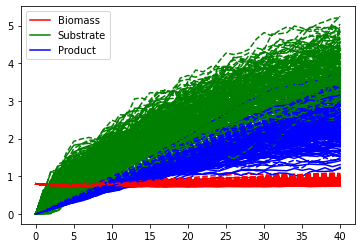

Generated resutls with Ts= 0.1
using 100 iterations


In [2]:
xk = [0.8, 0, 0]  
xkm = [0.8, 0, 0]
Ts = 0.1 #Sampling time, make sure that it's the same as in main
Nk = 40
xlist_plant = [xk]
xlist_model = [xkm]
Xdata = []
Ydata= []
nsim =100

for k in range(nsim):
    xk = [0.8, 0, 0]  
    xkm = [0.8, 0, 0]
    xlist_plant = [xk]
    xlist_model = [xkm]
#    print(k)
    D=np.random.uniform(0.0,0.5,Nk)
    Sf=np.random.uniform(5.0,15.0,Nk)

#     if k==0:
#        D[:]=0.3
#     elif k==1:
#        D[:]=0.0
        
    for i in range(Nk):
        xkplus_plant = CaseStudy.plant_dynamics(xk, D[i],Sf[i],Ts)
        xlist_plant.append(xkplus_plant)
        xk = xkplus_plant
         
        xkplus_model = CaseStudy.model_dynamics(xkm, D[i],Sf[i],Ts)
        #Save input states and model prediction
        Xdata.append([xkm[0],xkm[1],xkm[2],D[i],Sf[i]])
        Ydata.append([xkplus_model[0],xkplus_model[1],xkplus_model[2]])

        xlist_model.append(xkplus_model)
        xkm = xkplus_model
        
    states=np.array(xlist_plant)
    states_model=np.array(xlist_model)
    
    plt.plot(states[:,0],  color="red" )
    plt.plot(states[:,1],  color="green")
    plt.plot(states[:,2],  color="blue")
    plt.plot(states_model[:,0], '--',color="red")
    plt.plot(states_model[:,1], '--',color="green")
    plt.plot(states_model[:,2], '--',color="blue")
    
plt.legend(['Biomass','Substrate','Product'])
plt.show()
print('Generated resutls with Ts=',Ts)
print('using', nsim, 'iterations')
X=np.array(Xdata)
Y=np.array(Ydata)
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
savetxt('Xdata.csv',X, delimiter=',')
savetxt('Ydata.csv',Y, delimiter=',')


In [3]:
# import scipy.io
# model_data = scipy.io.loadmat('Data.mat')

In [4]:
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
Zin=loadtxt('Xdata.csv', delimiter=',')
Zout= loadtxt('Ydata.csv', delimiter=',')

In [5]:
Zin.shape

(4000, 5)

#### Prepare Dataset

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(Zin, Zout, shuffle=True, train_size=0.9, random_state=42)
in_dim = X_train.shape[1]
out_dim = Y_train.shape[1]

In [7]:
Y_test.shape

(400, 3)

In [8]:
X_train.shape

(3600, 5)

In [9]:
pred_model = neural_model(epochs=400,bs=15).get_model(X_train, Y_train, False, [], X_test,Y_test, validation=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 12)           72          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 12)           156         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 12)           156         dense_1[0]

3600/3600 [==============================] - 0s 54us/sample - loss: 0.0044 - val_loss: 0.0051
Epoch 47/400
3600/3600 [==============================] - 0s 57us/sample - loss: 0.0043 - val_loss: 0.0039
Epoch 48/400
3600/3600 [==============================] - 0s 53us/sample - loss: 0.0043 - val_loss: 0.0062
Epoch 49/400
3600/3600 [==============================] - 0s 54us/sample - loss: 0.0043 - val_loss: 0.0043
Epoch 50/400
3600/3600 [==============================] - 0s 53us/sample - loss: 0.0041 - val_loss: 0.0057
Epoch 51/400
3600/3600 [==============================] - 0s 55us/sample - loss: 0.0042 - val_loss: 0.0032
Epoch 52/400
3600/3600 [==============================] - 0s 55us/sample - loss: 0.0041 - val_loss: 0.0038
Epoch 53/400
3600/3600 [==============================] - 0s 56us/sample - loss: 0.0040 - val_loss: 0.0032
Epoch 54/400
3600/3600 [==============================] - 0s 55us/sample - loss: 0.0040 - val_loss: 0.0022
Epoch 55/400
3600/3600 [==========================

3600/3600 [==============================] - 0s 57us/sample - loss: 0.0025 - val_loss: 0.0027
Epoch 123/400
3600/3600 [==============================] - 0s 56us/sample - loss: 0.0024 - val_loss: 0.0027
Epoch 124/400
3600/3600 [==============================] - 0s 56us/sample - loss: 0.0024 - val_loss: 0.0023
Epoch 125/400
3600/3600 [==============================] - 0s 54us/sample - loss: 0.0025 - val_loss: 0.0026
Epoch 126/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0024 - val_loss: 0.0019
Epoch 127/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0024 - val_loss: 0.0032
Epoch 128/400
3600/3600 [==============================] - 0s 62us/sample - loss: 0.0024 - val_loss: 0.0039
Epoch 129/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0025 - val_loss: 0.0026
Epoch 130/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0023 - val_loss: 0.0030
Epoch 131/400
3600/3600 [=================

Epoch 198/400
3600/3600 [==============================] - 0s 56us/sample - loss: 0.0019 - val_loss: 0.0018
Epoch 199/400
3600/3600 [==============================] - 0s 58us/sample - loss: 0.0020 - val_loss: 0.0024
Epoch 200/400
3600/3600 [==============================] - 0s 55us/sample - loss: 0.0019 - val_loss: 0.0015
Epoch 201/400
3600/3600 [==============================] - 0s 54us/sample - loss: 0.0019 - val_loss: 0.0032
Epoch 202/400
3600/3600 [==============================] - 0s 56us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 203/400
3600/3600 [==============================] - 0s 57us/sample - loss: 0.0020 - val_loss: 0.0019
Epoch 204/400
3600/3600 [==============================] - 0s 56us/sample - loss: 0.0019 - val_loss: 0.0025
Epoch 205/400
3600/3600 [==============================] - 0s 55us/sample - loss: 0.0019 - val_loss: 0.0018
Epoch 206/400
3600/3600 [==============================] - 0s 55us/sample - loss: 0.0019 - val_loss: 0.0023
Epoch 207/400
3600/3600 [===

Epoch 274/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0017 - val_loss: 0.0018
Epoch 275/400
3600/3600 [==============================] - 0s 58us/sample - loss: 0.0017 - val_loss: 0.0024
Epoch 276/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 277/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0017 - val_loss: 0.0012
Epoch 278/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0016 - val_loss: 0.0026
Epoch 279/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 280/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0016 - val_loss: 0.0013
Epoch 281/400
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 282/400
3600/3600 [==============================] - 0s 58us/sample - loss: 0.0017 - val_loss: 0.0021
Epoch 283/400
3600/3600 [===

Epoch 350/400
3600/3600 [==============================] - 0s 78us/sample - loss: 0.0015 - val_loss: 0.0014
Epoch 351/400
3600/3600 [==============================] - 0s 77us/sample - loss: 0.0015 - val_loss: 0.0015
Epoch 352/400
3600/3600 [==============================] - 0s 77us/sample - loss: 0.0015 - val_loss: 0.0013
Epoch 353/400
3600/3600 [==============================] - 0s 77us/sample - loss: 0.0015 - val_loss: 0.0012
Epoch 354/400
3600/3600 [==============================] - 0s 77us/sample - loss: 0.0014 - val_loss: 0.0015
Epoch 355/400
3600/3600 [==============================] - 0s 79us/sample - loss: 0.0015 - val_loss: 0.0012
Epoch 356/400
3600/3600 [==============================] - 0s 78us/sample - loss: 0.0015 - val_loss: 0.0018
Epoch 357/400
3600/3600 [==============================] - 0s 77us/sample - loss: 0.0015 - val_loss: 0.0018
Epoch 358/400
3600/3600 [==============================] - 0s 77us/sample - loss: 0.0015 - val_loss: 0.0017
Epoch 359/400
3600/3600 [===

(0.0007808256482428903, 0.1)

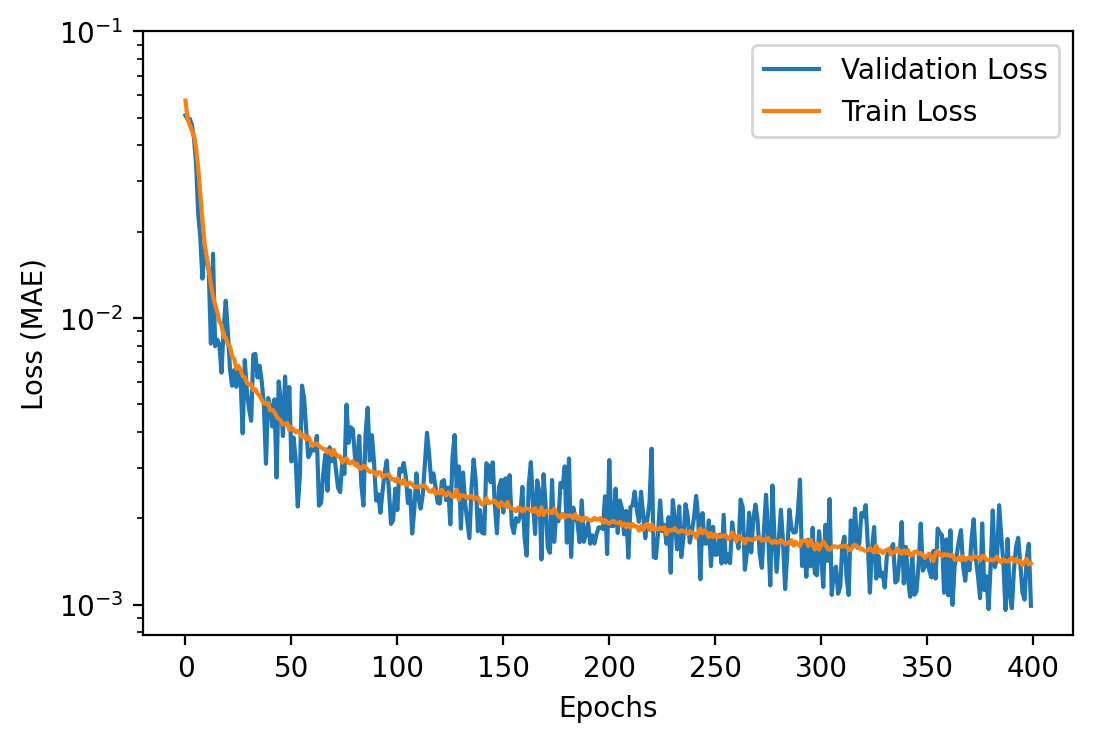

In [10]:
plt.figure(2,dpi=200)
plt.semilogy(pred_model.history.history['val_loss'])
plt.semilogy(pred_model.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend(['Validation Loss','Train Loss'])
plt.ylim([0,0.1])

In [11]:
weights1 = pred_model.get_weights() # returs a numpy list of weights

In [12]:
#nnet.set_weights(weights)

In [13]:
Wmat = np.array(weights1)

In [14]:
import pickle as pkl
fileObject = open("weights_initialization.npy", 'wb')
pkl.dump(Wmat, fileObject)
fileObject.close()

In [15]:
fileObject_load = open("weights_initialization.npy", 'rb')
Wmat = pkl.load(fileObject_load)

In [16]:
Wmat

array([array([[-0.32573098, -0.3579925 ,  0.5214506 , -0.73843074, -0.27281624,
        -0.6291507 , -0.5062391 ,  0.41954762,  0.60425395,  0.13445826,
         0.14107986,  0.5263525 ],
       [ 0.12215139, -0.2818806 , -0.47430727, -0.02019107,  0.32535505,
         0.09603803,  0.18801199, -0.33224335,  0.0167748 , -0.4450647 ,
        -0.46989867,  0.34519702],
       [-0.00603405,  0.32414076,  0.14248718, -0.20771186, -0.45921087,
        -0.3537635 ,  0.41479212,  0.6431672 ,  0.12336786, -0.00380411,
        -0.28706577, -0.41443655],
       [-2.4144413 ,  1.7761387 ,  0.5519382 , -0.19725473, -0.61615   ,
         1.9941903 ,  1.8496757 , -0.3103389 , -2.132709  , -0.09000462,
         0.76885265, -0.35079876],
       [ 0.11516538,  0.16573748,  0.33365273,  0.07875509, -0.34209156,
         0.21035445,  0.26347828, -0.60779136,  0.3661091 , -0.0540518 ,
         0.13588919, -0.4940094 ]], dtype=float32),
       array([ 0.05385418, -0.00848224,  0.00171528,  0.11665488, -0.02